In [33]:
import pandas as pd
import seaborn as sns

# STEP-1 : Understanding the data

In [3]:
df = pd.read_csv("BlackFriday.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df = df.astype({'User_ID' : str,'Product_Category_1' : float})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  object 
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  float64
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 49.2+ MB


In [7]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# STEP-2 : Handling missing data

In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
df.fillna({'Product_Category_2':0.0,'Product_Category_3':0.0},inplace=True)                                                  

In [10]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# STEP-3 Analyzing Columns

In [11]:
col = []
for column in df.columns:
    lst = [column,df[column].nunique(),df[column].unique()]
    col.append(lst)
col_data = pd.DataFrame(col,columns=['Name','Number_of_Unique_values','Values'])

In [11]:
col_data

,Name,Number_of_Unique_values,Values
0,User_ID,5891,"[1000001, 1000002, 1000003, 1000004, 1000005, ..."
1,Product_ID,3623,"[P00069042, P00248942, P00087842, P00085442, P..."
2,Gender,2,"[F, M]"
3,Age,7,"[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]"
4,Occupation,21,"[10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11,..."
5,City_Category,3,"[A, C, B]"
6,Stay_In_Current_City_Years,5,"[2, 4+, 3, 1, 0]"
7,Marital_Status,2,"[0, 1]"
8,Product_Category_1,18,"[3.0, 1.0, 12.0, 8.0, 5.0, 4.0, 2.0, 6.0, 14.0..."
9,Product_Category_2,18,"[0.0, 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5..."


In [12]:
df["Purchase"].sum()

5017668378

In [13]:
df["Purchase"].sum()/len(df['Purchase'])

9333.859852635065

### 3.1 Analysing gender column

In [14]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']),len(df[df['Gender'] == 'F'])]},
                    index = ['Male','Female'])
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

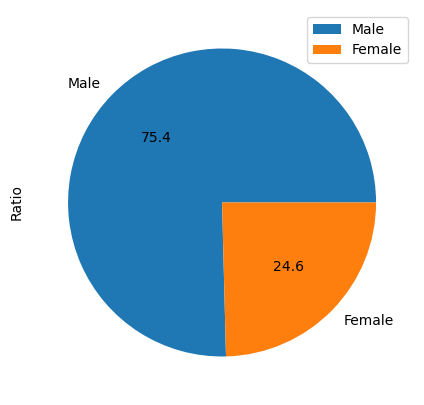

In [15]:
data.plot.pie(y = 'Ratio',figsize = (5,5),autopct = '%.1f')

<Axes: title={'center': 'Gender Ratio'}>

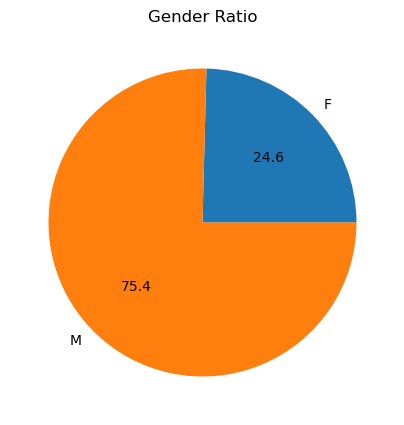

In [16]:
df.groupby('Gender').size().plot(kind = 'pie',autopct ='%.1f',
                                 title = 'Gender Ratio',figsize = (5,5))

<Axes: xlabel='Gender'>

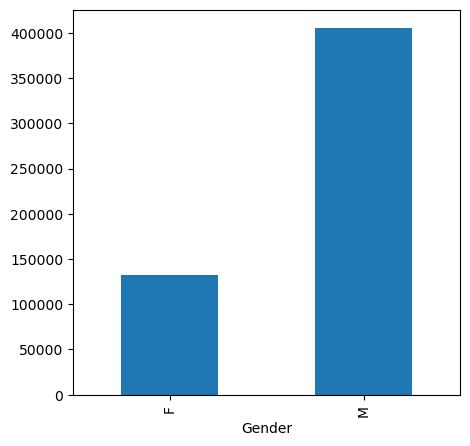

In [17]:
df.groupby('Gender').size().plot(kind = 'bar',figsize = (5,5))

<Axes: >

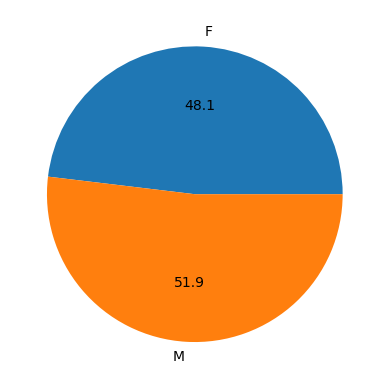

In [19]:
df.groupby('Gender')['Purchase'].mean().plot(kind = 'pie',
                                             autopct = '%.1f',
                                             ylabel = '',legend=False)

### 3.2 Analysing Age and Martial Status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

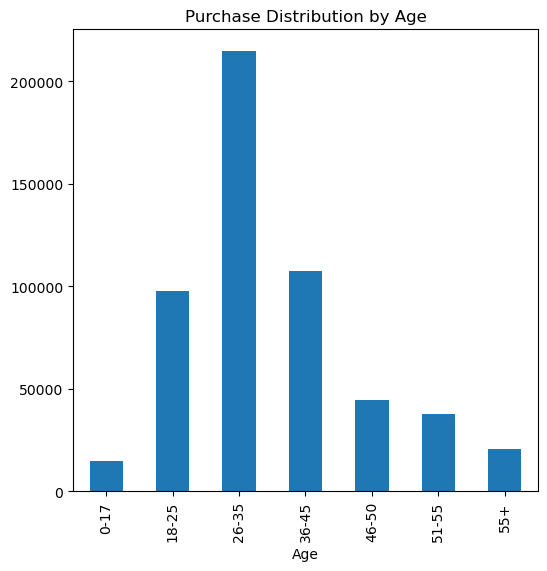

In [15]:
df.groupby('Age').size().plot(kind='bar',figsize = (6,6),title='Purchase Distribution by Age')

In [16]:
lst = []
Age = []
for i in df['Age'].unique():
    lst = [i,df[df['Age'] == i]["Product_ID"].nunique()]
    Age.append(lst)
data = pd.DataFrame(Age,columns=["Age","No_of_unique_products"])
data

,Age,No_of_unique_products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

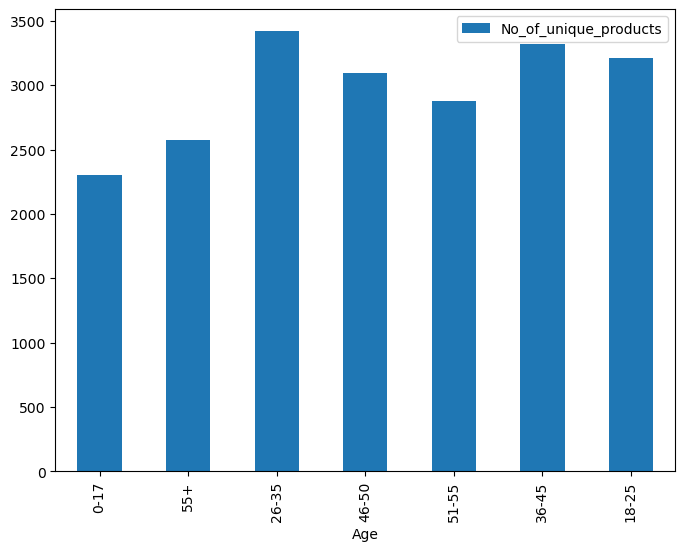

In [17]:
data.plot.bar(x = 'Age',y = 'No_of_unique_products',figsize=(8,6))

In [18]:
lst = []
Age = []
for i in df['Age'].unique():
    lst = [i,df[df['Age'] == i]["Product_ID"].nunique(),
           df[df['Age'] == i]["Product_ID"].unique()]
    Age.append(lst)
Age_df = pd.DataFrame(Age,columns=["Age","No_of_unique_products","Unique_Product_ID"])
Age_df

,Age,No_of_unique_products,Unique_Product_ID
0,0-17,2300,"[P00069042, P00248942, P00087842, P00085442, P..."
1,55+,2573,"[P00285442, P00117442, P00322042, P00216342, P..."
2,26-35,3419,"[P00193542, P00274942, P00251242, P00014542, P..."
3,46-50,3099,"[P00184942, P00346142, P0097242, P00129542, P0..."
4,51-55,2877,"[P00231342, P00190242, P0096642, P00058442, P0..."
5,36-45,3318,"[P00036842, P00085942, P00118742, P00297942, P..."
6,18-25,3213,"[P00366542, P00190742, P00151842, P00112642, P..."


<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

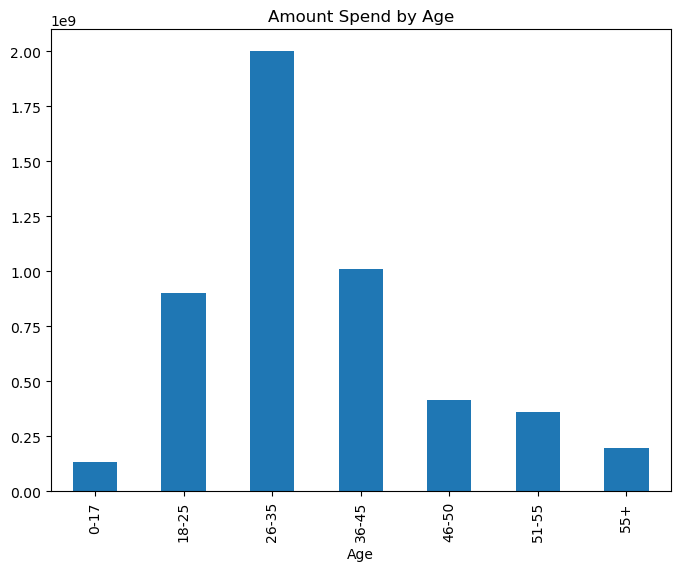

In [22]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar',figsize=(8,6),title='Amount Spend by Age')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

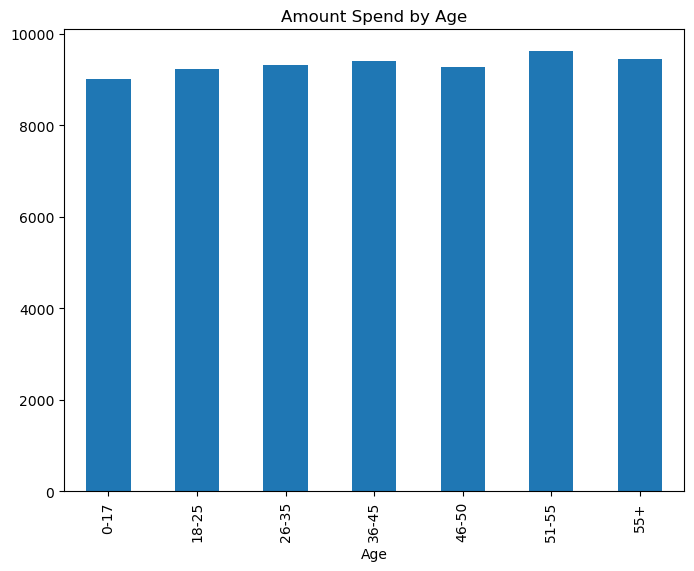

In [23]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'bar',figsize=(8,6),title='Amount Spend by Age')

<Axes: >

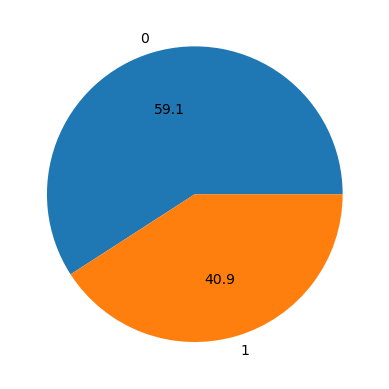

In [27]:
df.groupby('Marital_Status').size().plot(kind = 'pie',autopct = '%0.1f')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Marital_Status'>

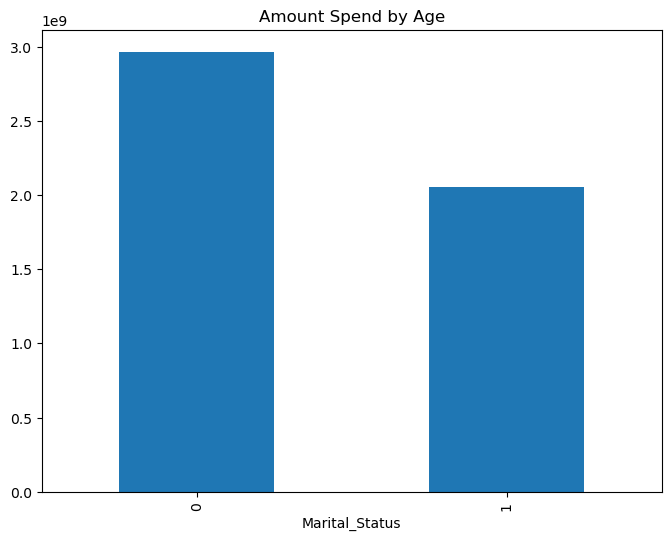

In [28]:
df.groupby('Marital_Status')['Purchase'].sum().plot(kind = 'bar',figsize=(8,6),title='Amount Spend by Marital_Status')

### 3.3 Combining the Gender and Marital_Status

In [30]:
l =[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df["Marital_Status"][i]))
df["MaritalGender"] = l

0         F_0
1         F_0
2         F_0
3         F_0
4         M_0
         ... 
537572    M_0
537573    M_0
537574    M_0
537575    M_0
537576    M_0
Name: MaritalGender, Length: 537577, dtype: object

In [31]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,0.0,0.0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,0.0,0.0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,0.0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,0.0,0.0,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

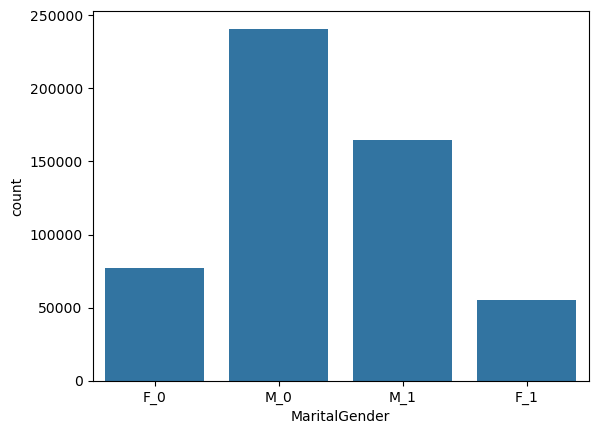

In [34]:
sns.countplot(x = df["MaritalGender"])

<Axes: xlabel='Age', ylabel='count'>

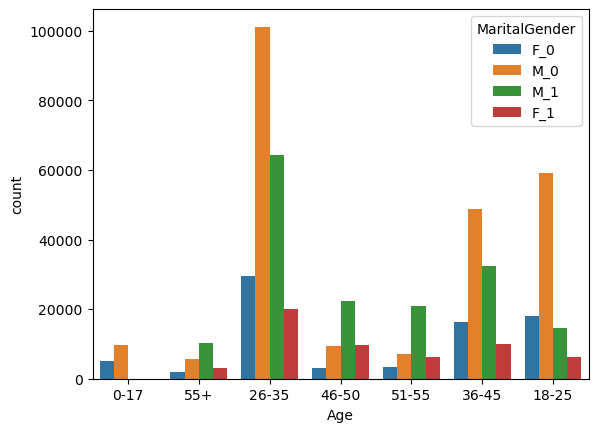

In [35]:
sns.countplot(x = df["Age"],hue= df["MaritalGender"])

<Axes: xlabel='Product_Category_1', ylabel='count'>

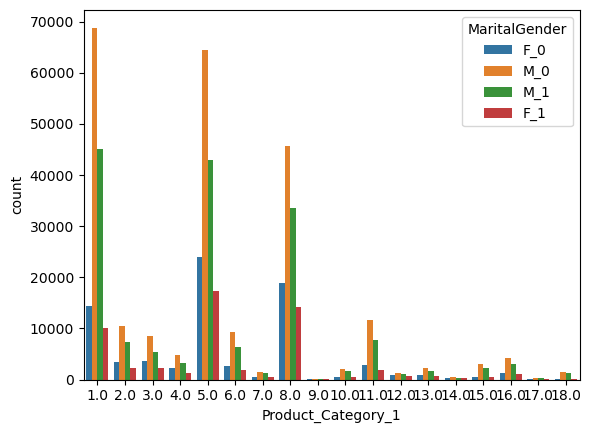

In [37]:
sns.countplot(x = df["Product_Category_1"],hue= df["MaritalGender"])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

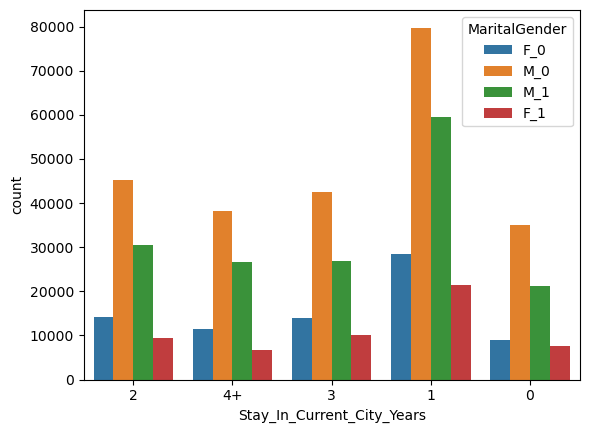

In [38]:
sns.countplot(x = df["Stay_In_Current_City_Years"],hue= df["MaritalGender"])

<Axes: xlabel='City_Category', ylabel='count'>

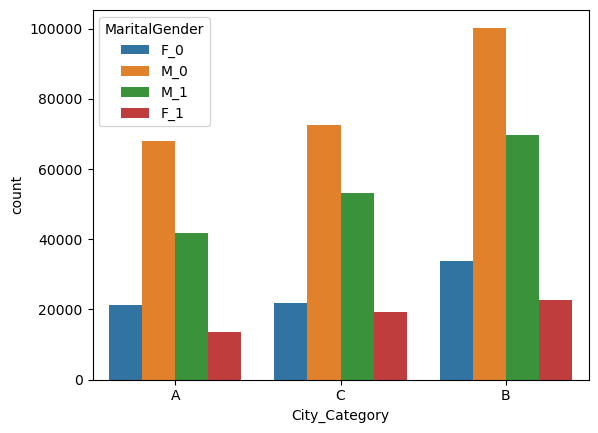

In [39]:
sns.countplot(x = df["City_Category"],hue= df["MaritalGender"])

### 3.4 Creating a new column with Age Column

In [40]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [41]:
l = []
for i in df["Age"]:
    if i == '0-17':
        l.append('Youth')
    elif i == '26-35' or '18-25' or '36-45':
        l.append('Adult')
    else:
        l.append('Senior')
df["Age_Category"] = l
        

In [42]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MaritalGender,Age_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,0.0,0.0,8370,F_0,Youth
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200,F_0,Youth
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,0.0,0.0,1422,F_0,Youth
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,0.0,1057,F_0,Youth
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,0.0,0.0,7969,M_0,Adult


<Axes: xlabel='Product_Category_1', ylabel='count'>

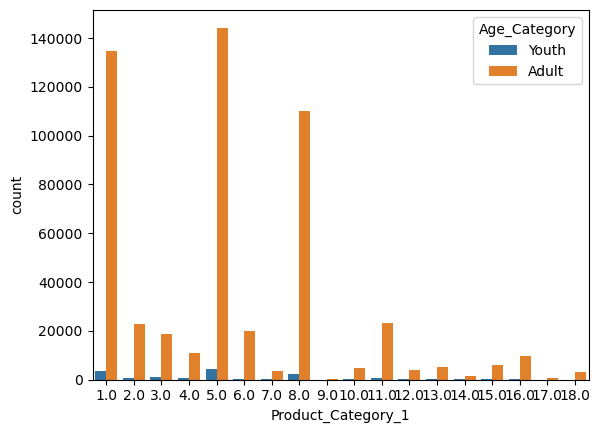

In [43]:
sns.countplot(x = df["Product_Category_1"],hue= df["Age_Category"])

<Axes: xlabel='Age_Category'>

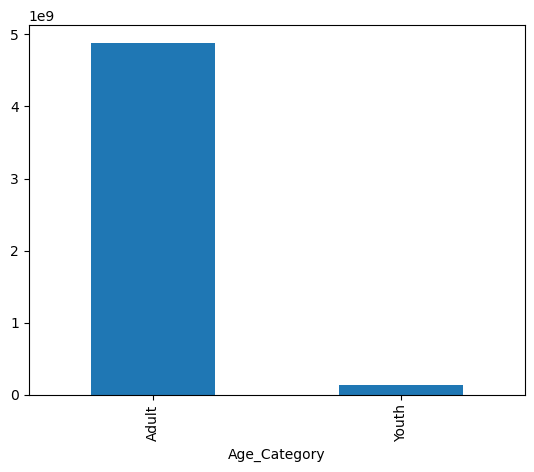

In [46]:
df.groupby('Age_Category')["Purchase"].sum().plot(kind='bar')

In [47]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MaritalGender,Age_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,0.0,0.0,8370,F_0,Youth
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200,F_0,Youth
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,0.0,0.0,1422,F_0,Youth
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,0.0,1057,F_0,Youth
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,0.0,0.0,7969,M_0,Adult


<Axes: xlabel='City_Category'>

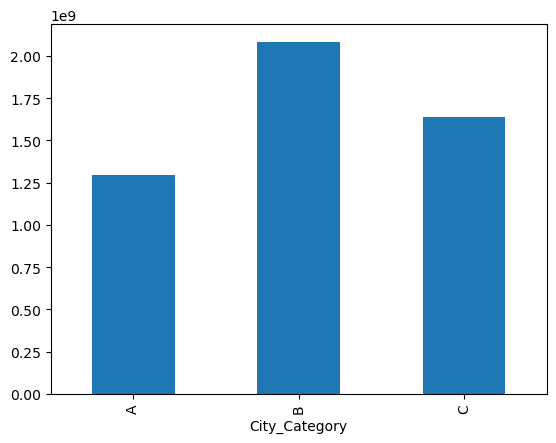

In [49]:
df.groupby("City_Category")["Purchase"].sum().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

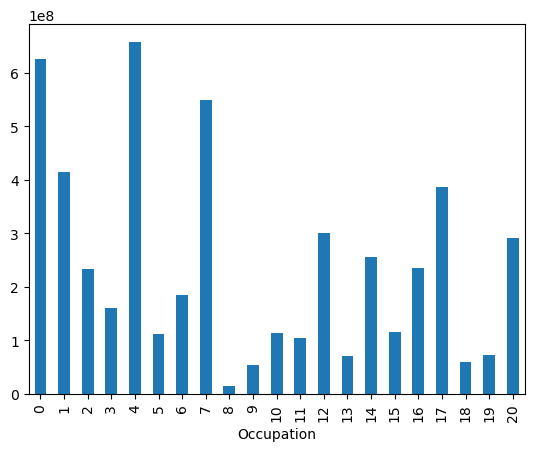

In [50]:
df.groupby("Occupation")["Purchase"].sum().plot(kind = 'bar')

### 3.5 Multi Column Analysis

<Axes: xlabel='Age', ylabel='count'>

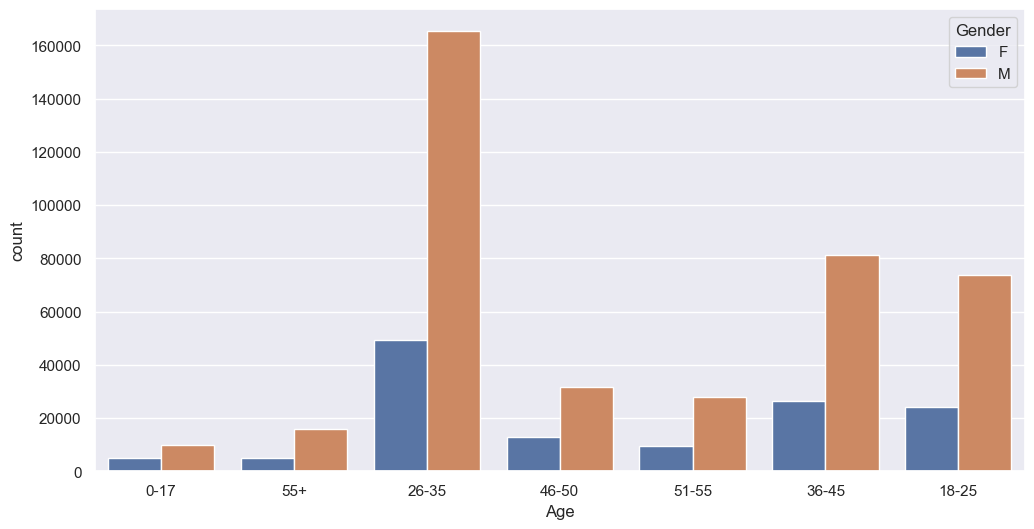

In [52]:
sns.set(rc = {"figure.figsize" : (12,6)})
sns.countplot(x = 'Age',hue = 'Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

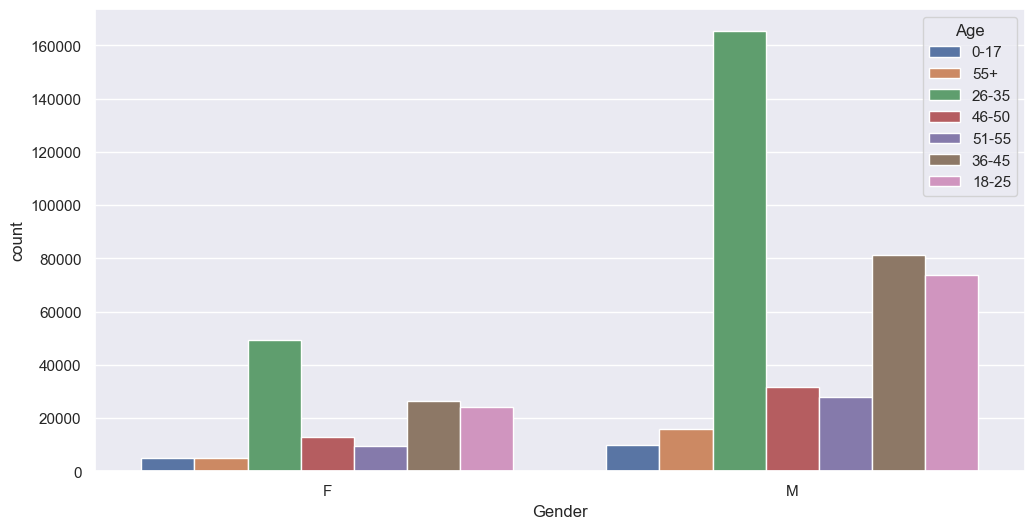

In [53]:
sns.set(rc = {"figure.figsize" : (12,6)})
sns.countplot(x = 'Gender',hue = 'Age',data=df)

<Axes: xlabel='Gender', ylabel='count'>

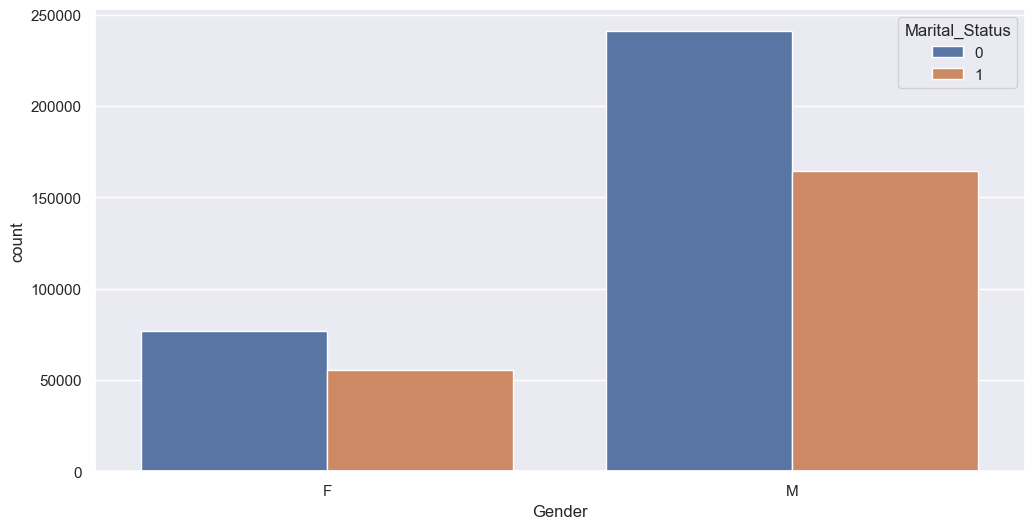

In [54]:
sns.set(rc = {"figure.figsize" : (12,6)})
sns.countplot(x = 'Gender',hue = 'Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

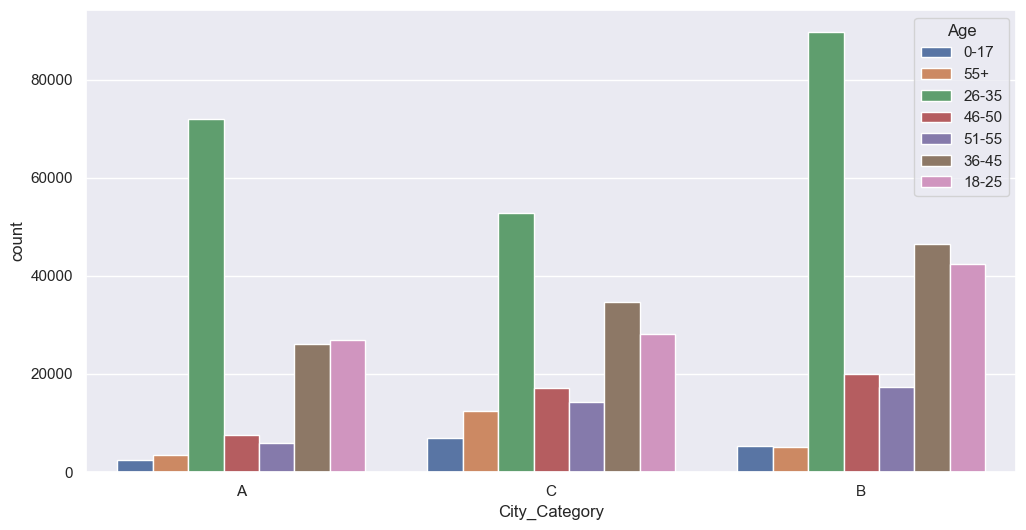

In [58]:
sns.countplot(x = 'City_Category',hue='Age',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

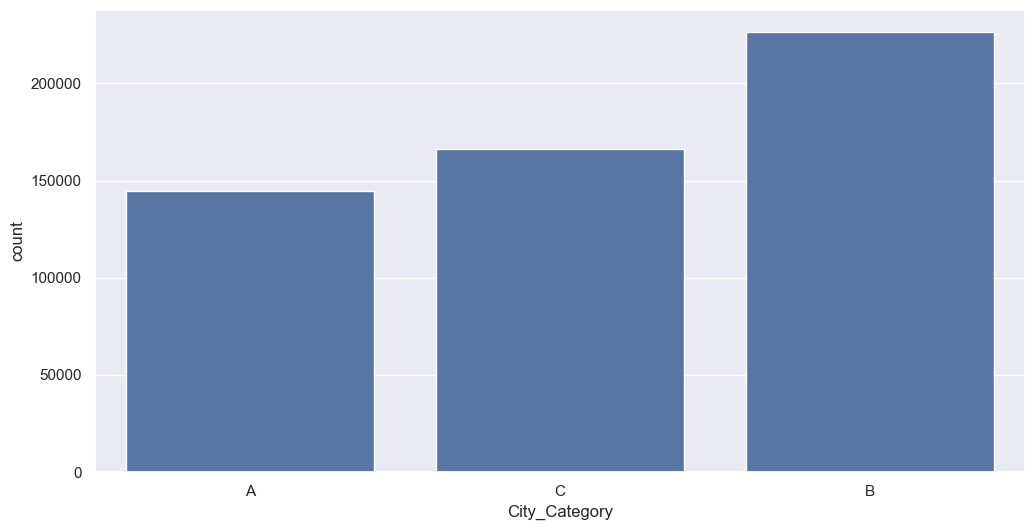

In [55]:
sns.countplot(x = df["City_Category"])

<Axes: >

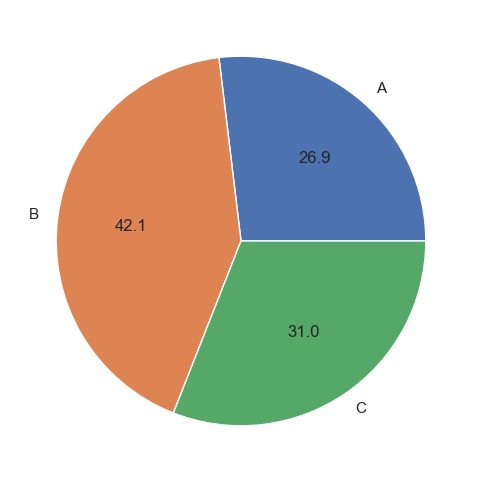

In [57]:
df.groupby('City_Category').size().plot(kind = 'pie',autopct='%.1f')

<Axes: xlabel='City_Category', ylabel='count'>

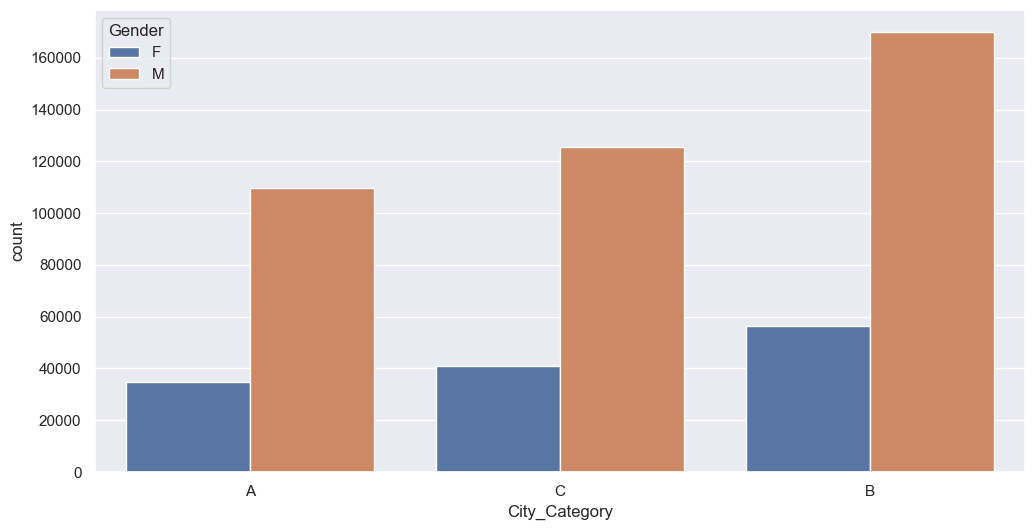

In [59]:
sns.countplot(x = 'City_Category', hue ='Gender',data=df)

<Axes: xlabel='City_Category'>

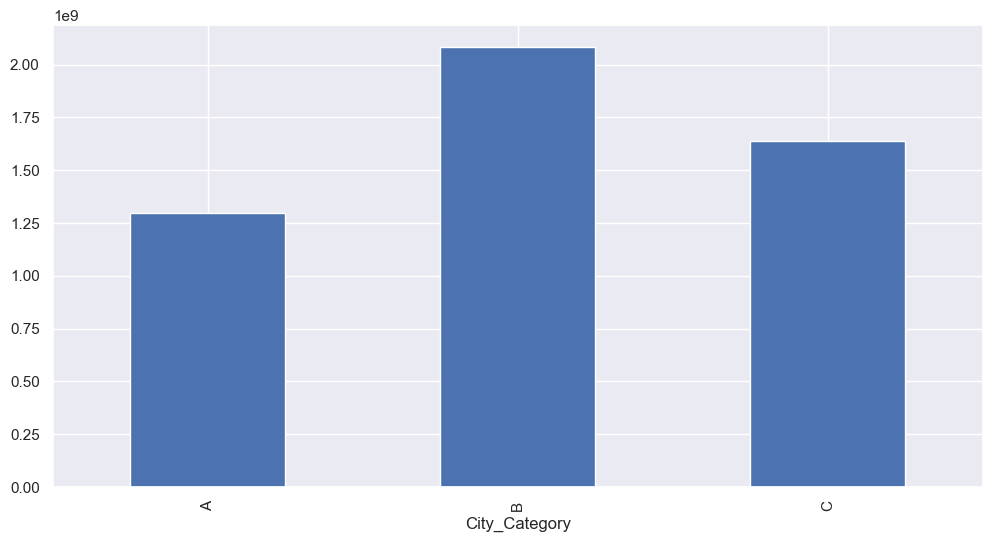

In [61]:
df.groupby('City_Category')["Purchase"].sum().plot(kind='bar')

<Axes: ylabel='Purchase'>

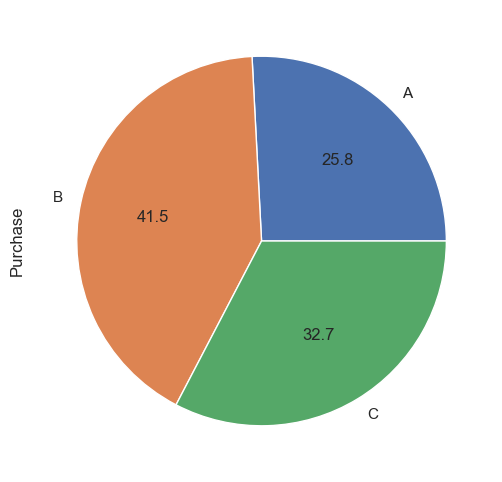

In [63]:
df.groupby('City_Category')["Purchase"].sum().plot(kind='pie',autopct = "%0.1f")

<Axes: ylabel='Purchase'>

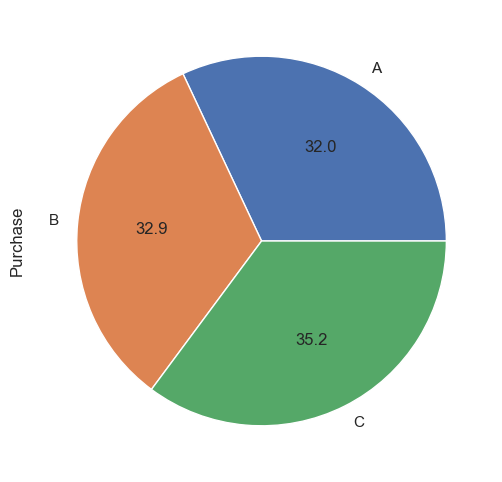

In [64]:
df.groupby('City_Category')["Purchase"].mean().plot(kind='pie',autopct = "%0.1f")

### 3.6 Occupation and Products Analysis

In [66]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,MaritalGender,Age_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,0.0,0.0,8370,F_0,Youth
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200,F_0,Youth
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,0.0,0.0,1422,F_0,Youth
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,0.0,1057,F_0,Youth
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,0.0,0.0,7969,M_0,Adult


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

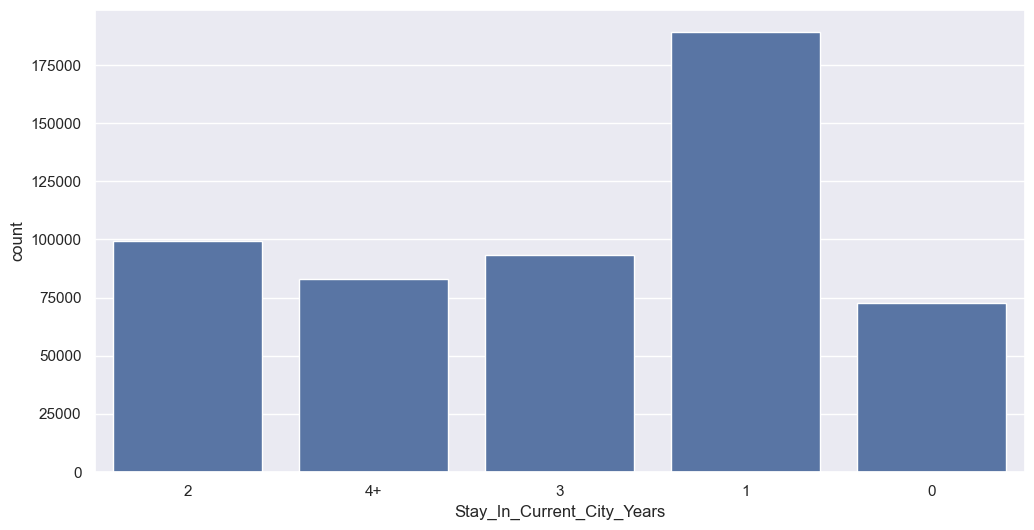

In [67]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

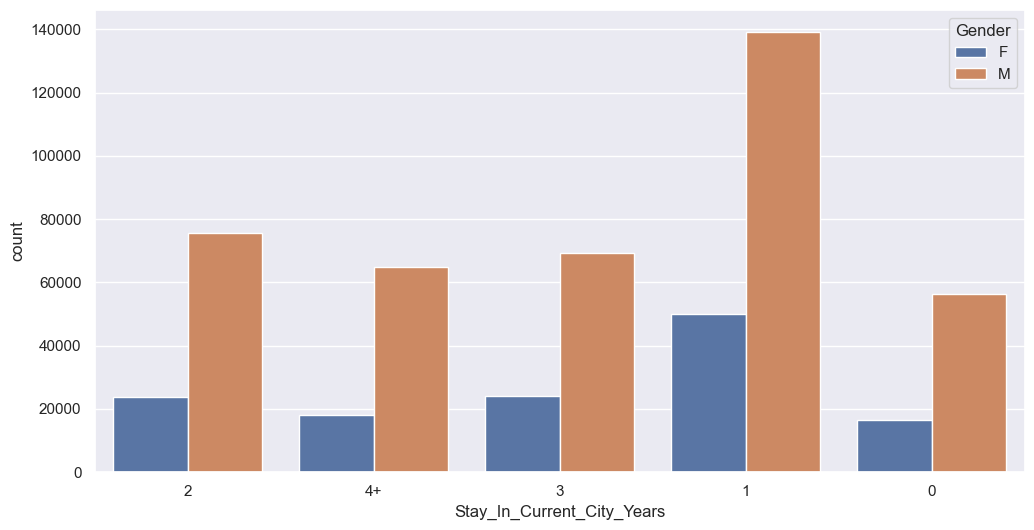

In [69]:
sns.countplot(x='Stay_In_Current_City_Years',hue ='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

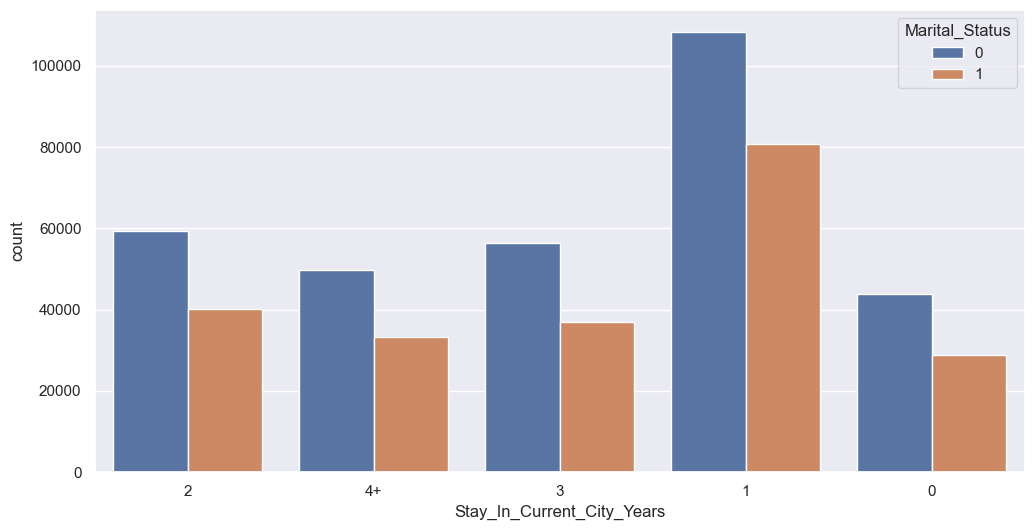

In [70]:
sns.countplot(x='Stay_In_Current_City_Years',hue ='Marital_Status',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

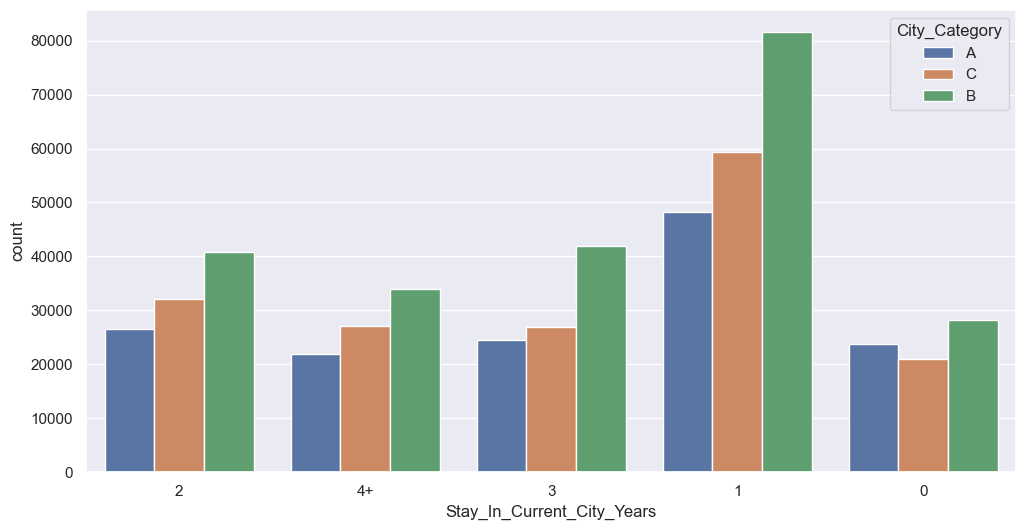

In [71]:
sns.countplot(x='Stay_In_Current_City_Years',hue ='City_Category',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

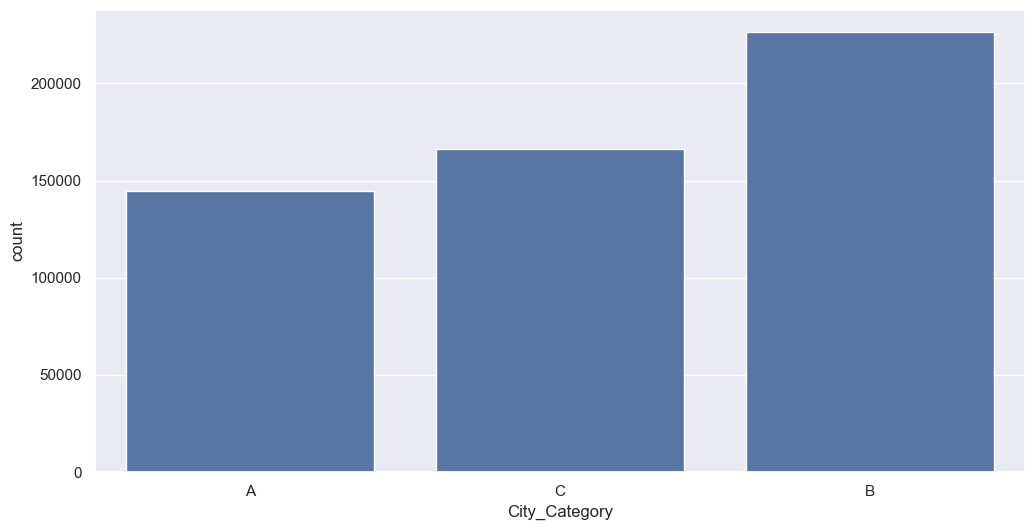

In [73]:
sns.countplot(x='City_Category',data=df)

<Axes: ylabel='Purchase'>

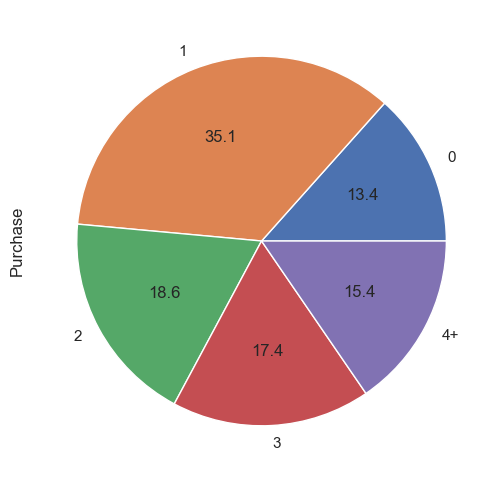

In [74]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind = 'pie',autopct='%0.1f')

<Axes: xlabel='Stay_In_Current_City_Years'>

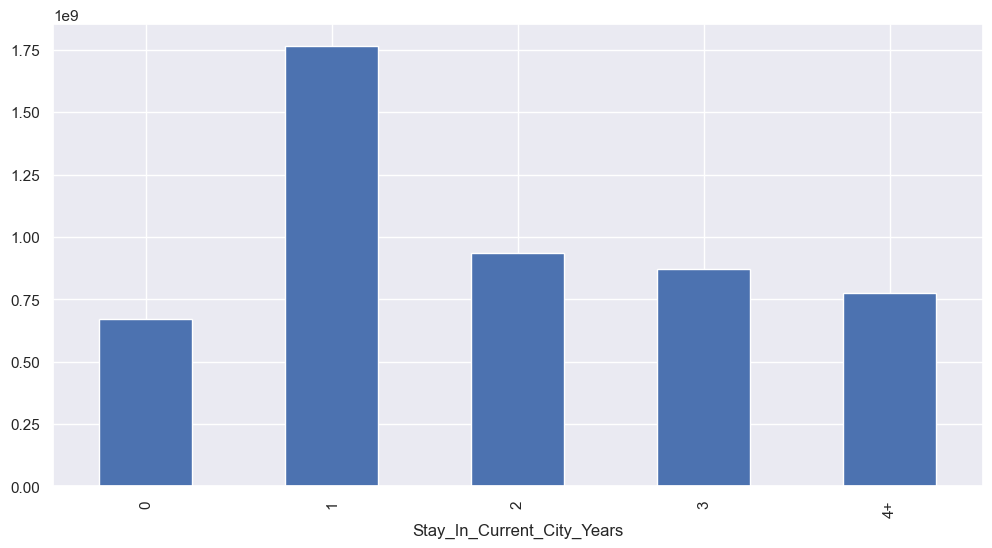

In [75]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].sum().plot(kind = 'bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

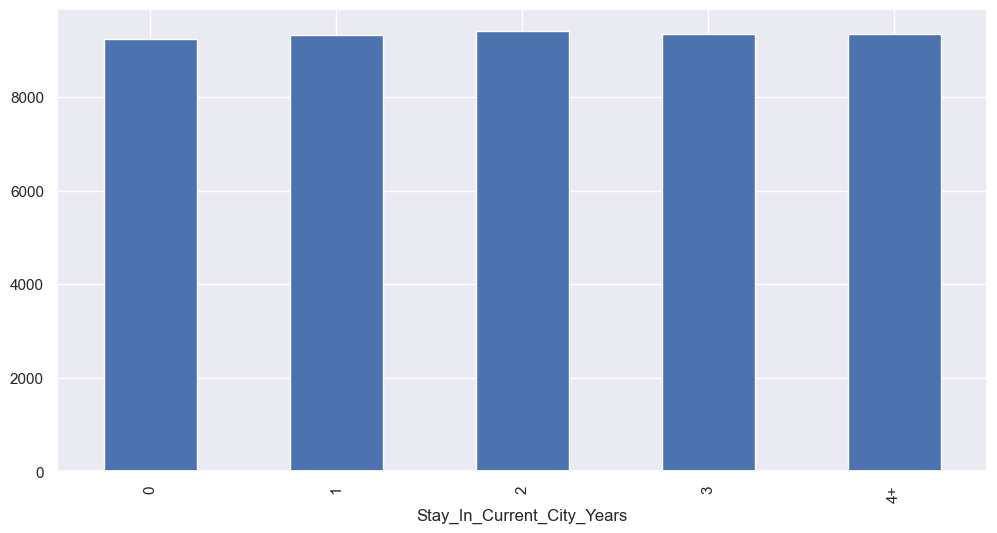

In [76]:
df.groupby("Stay_In_Current_City_Years")["Purchase"].mean().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

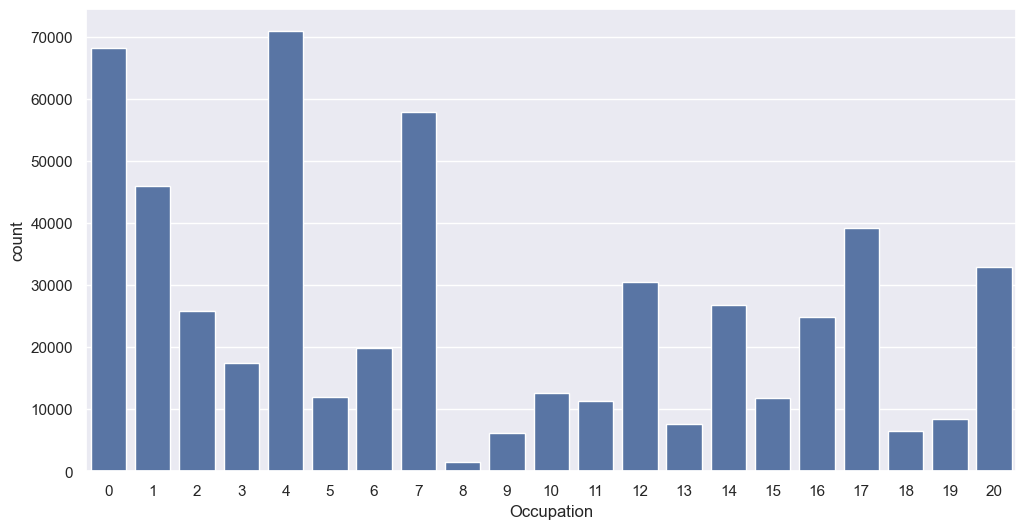

In [77]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

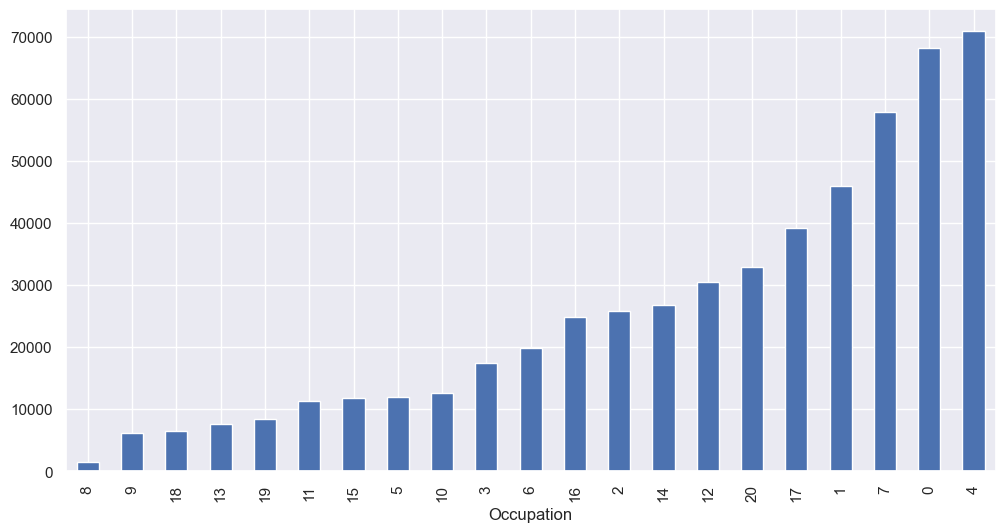

In [81]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

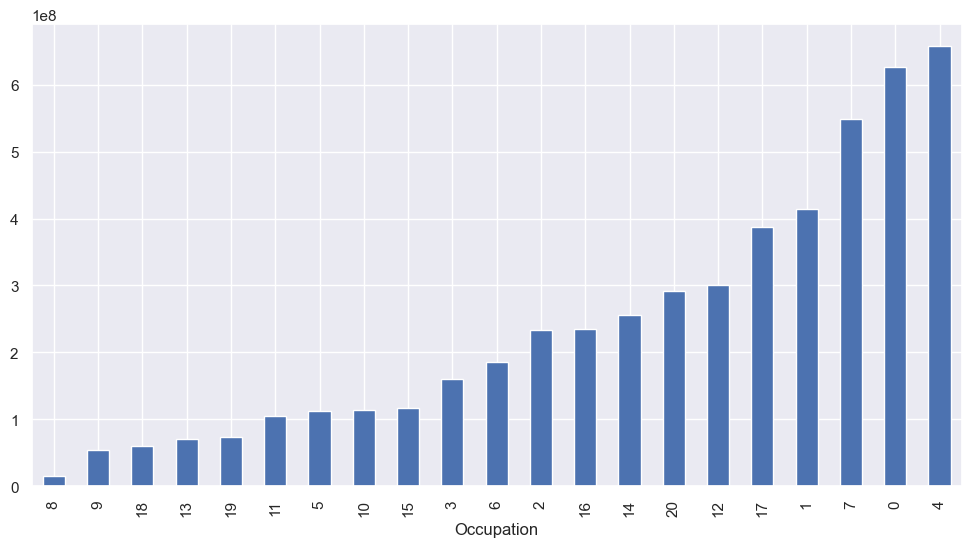

In [80]:
df.groupby('Occupation')["Purchase"].sum().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

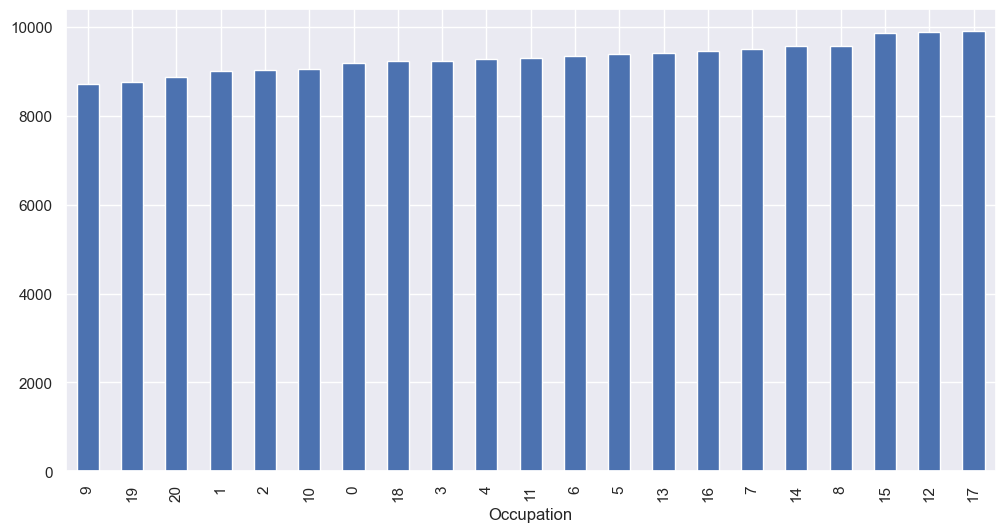

In [82]:
df.groupby('Occupation')["Purchase"].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

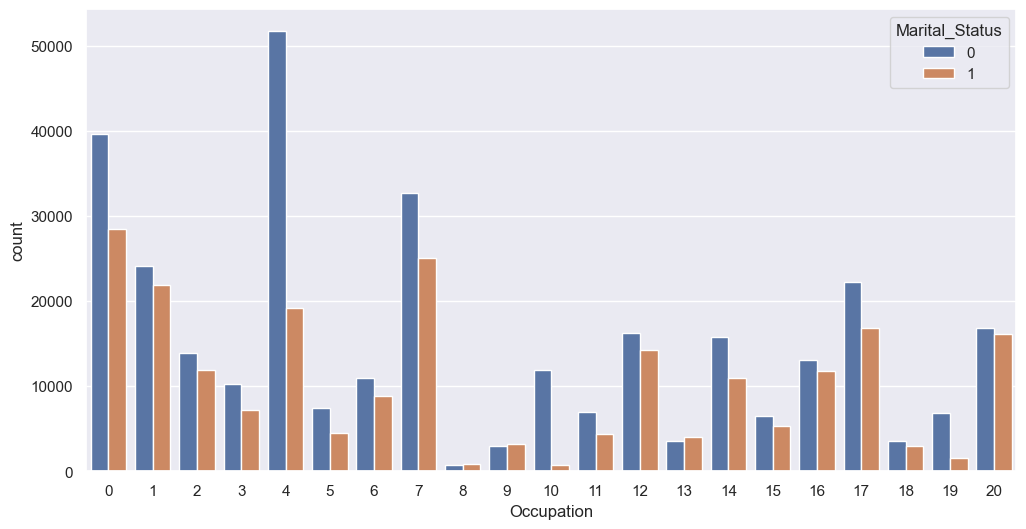

In [83]:
sns.countplot(x = 'Occupation',hue = 'Marital_Status', data =df)

<Axes: xlabel='Occupation', ylabel='count'>

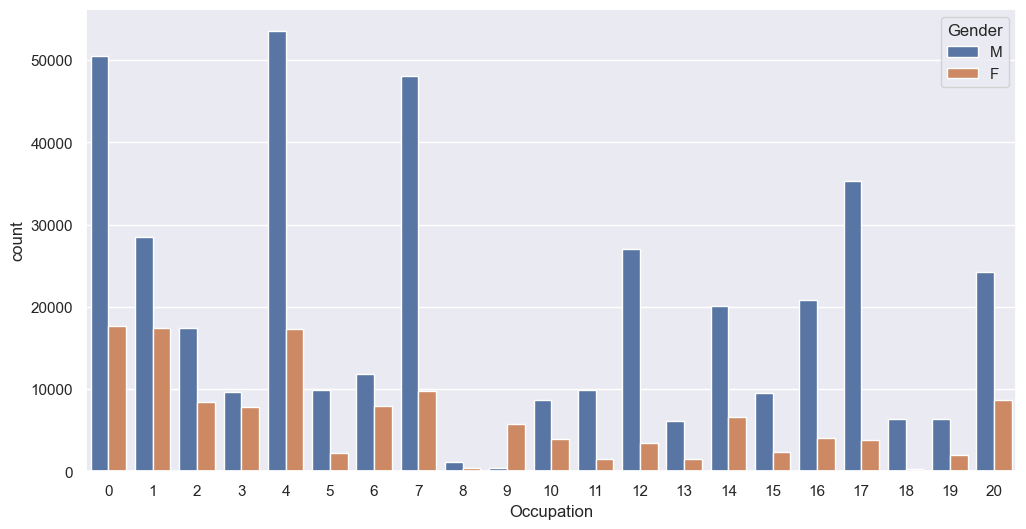

In [84]:
sns.countplot(x = 'Occupation',hue = 'Gender', data =df)

<Axes: xlabel='Occupation'>

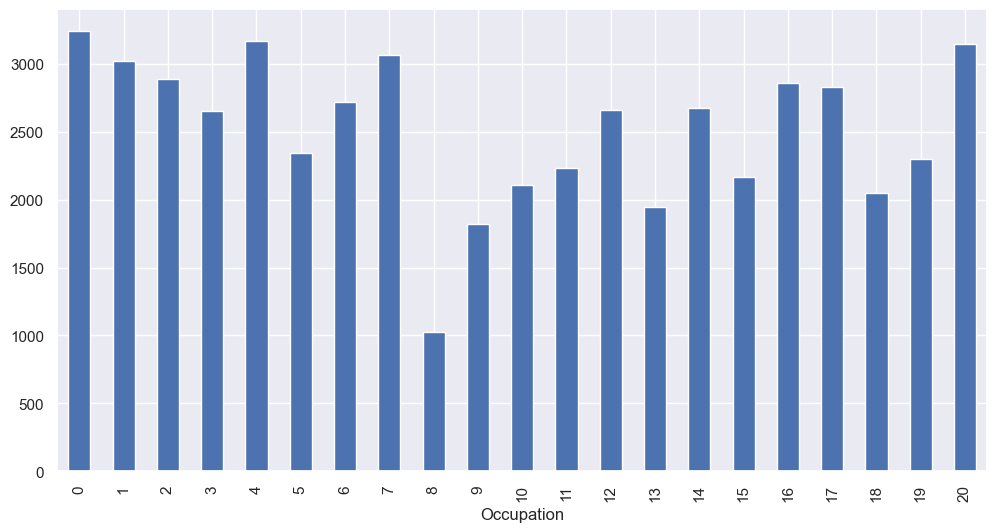

In [86]:
df.groupby('Occupation').nunique()["Product_ID"].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

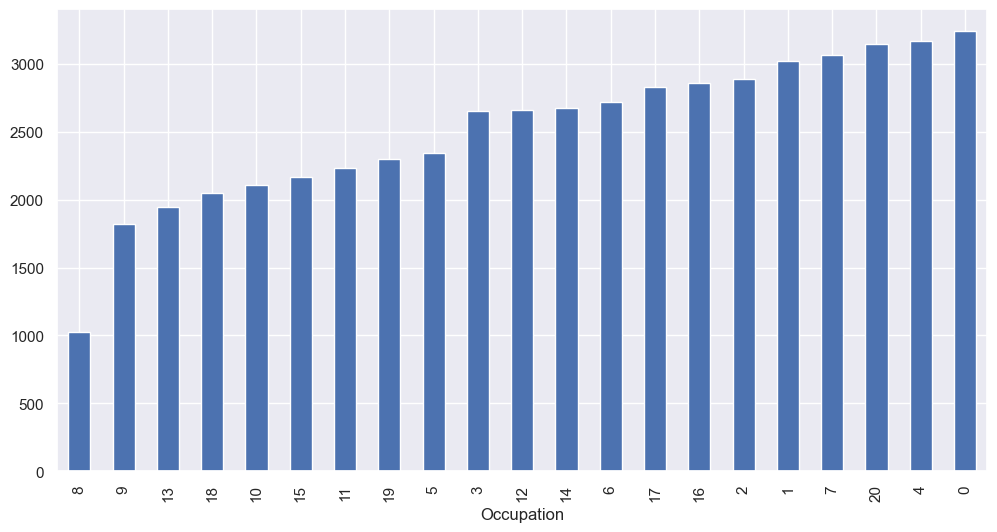

In [87]:
df.groupby('Occupation').nunique()["Product_ID"].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

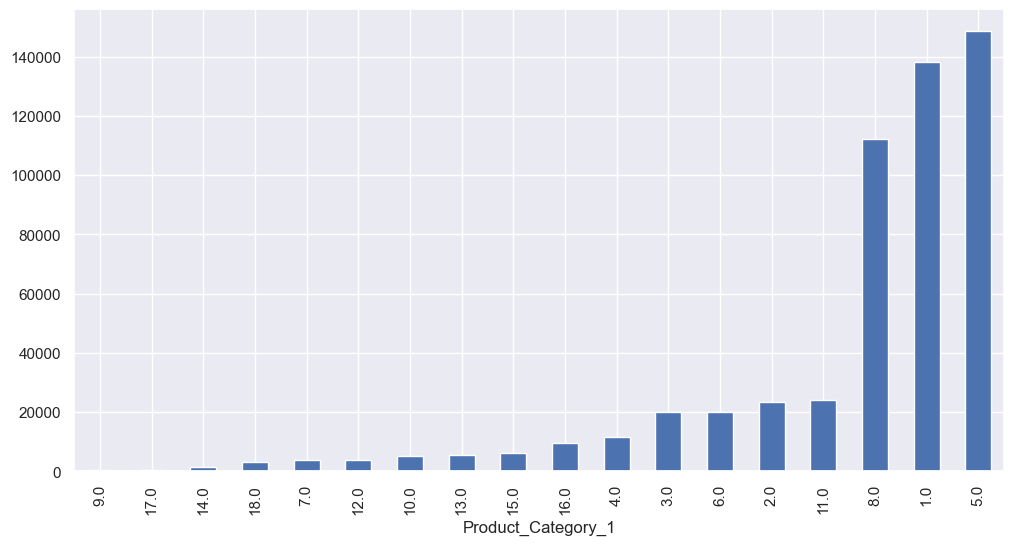

In [90]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

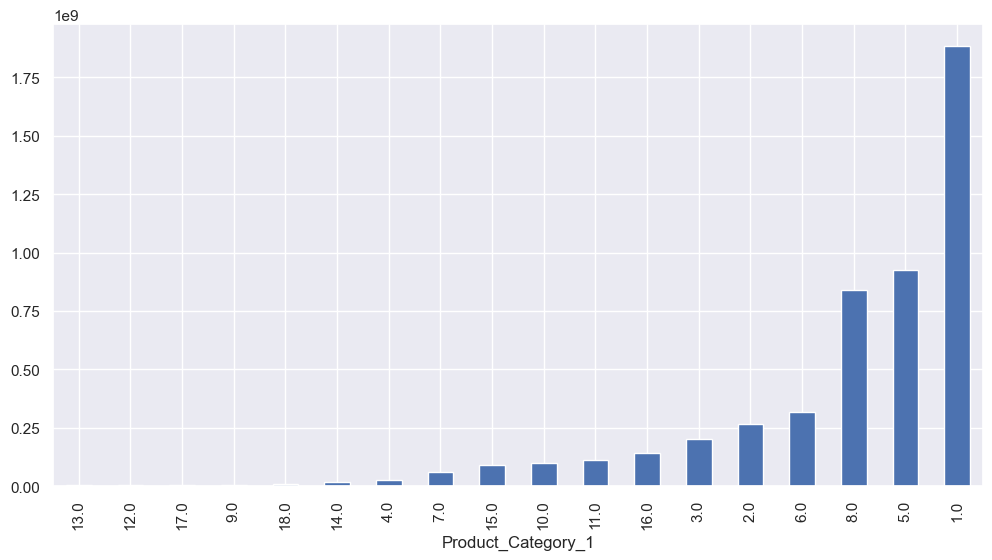

In [91]:
df.groupby('Product_Category_1')["Purchase"].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

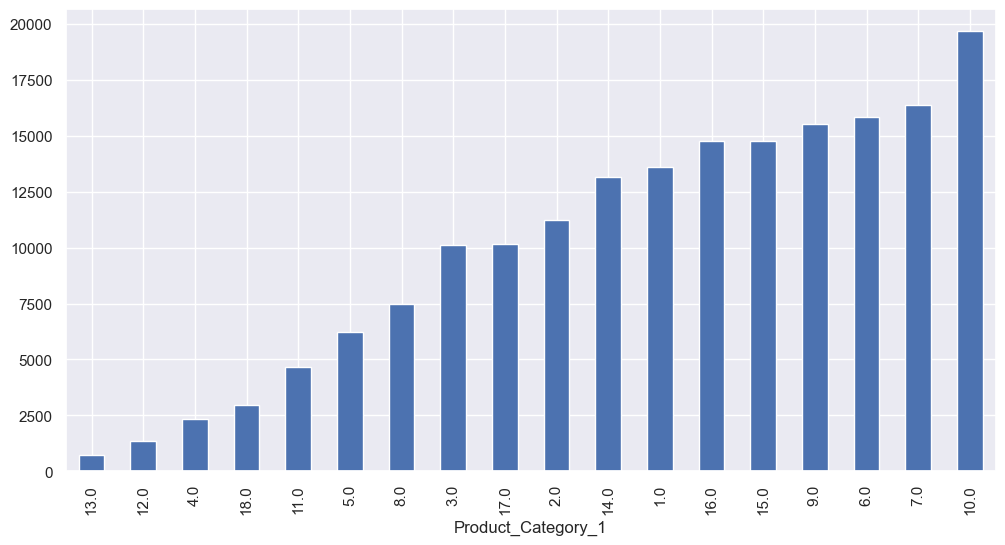

In [92]:
df.groupby('Product_Category_1')["Purchase"].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

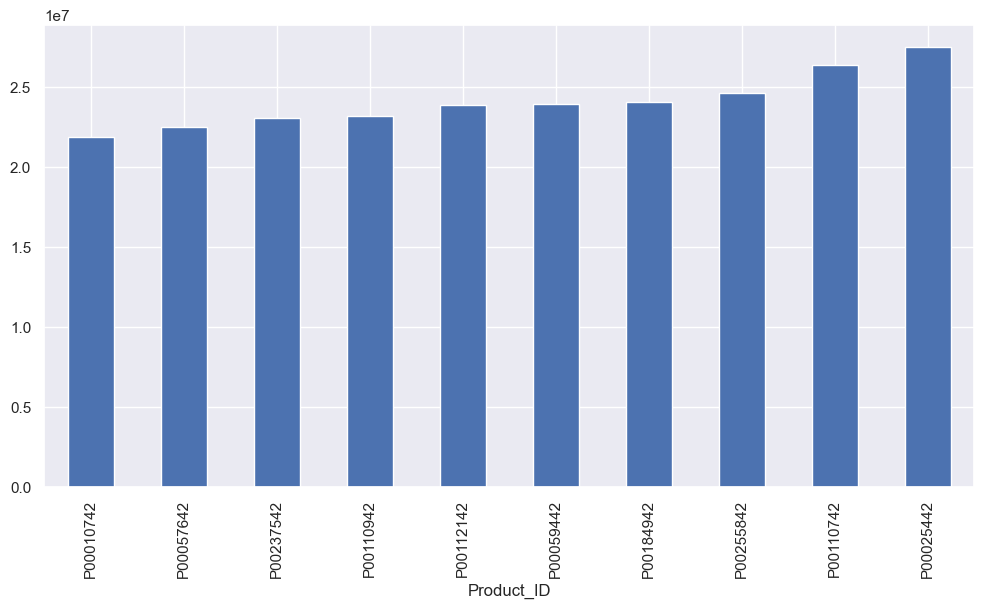

In [99]:
df.groupby('Product_ID')["Purchase"].sum().nlargest(10).sort_values().plot(kind='bar')
##Where they spend most money

<Axes: xlabel='Product_ID'>

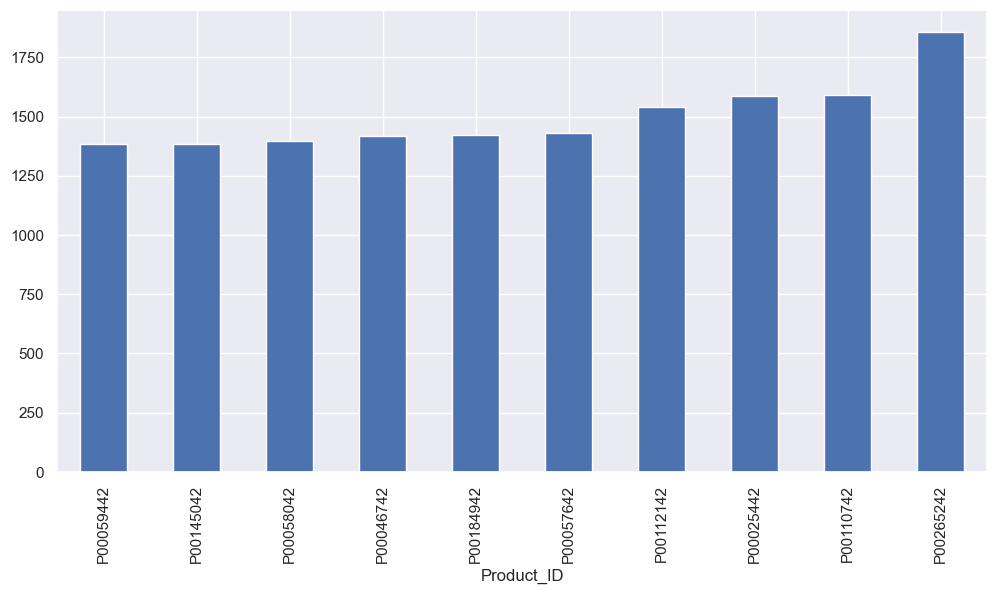

In [102]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')
## These are most selling products

<Axes: xlabel='Product_ID'>

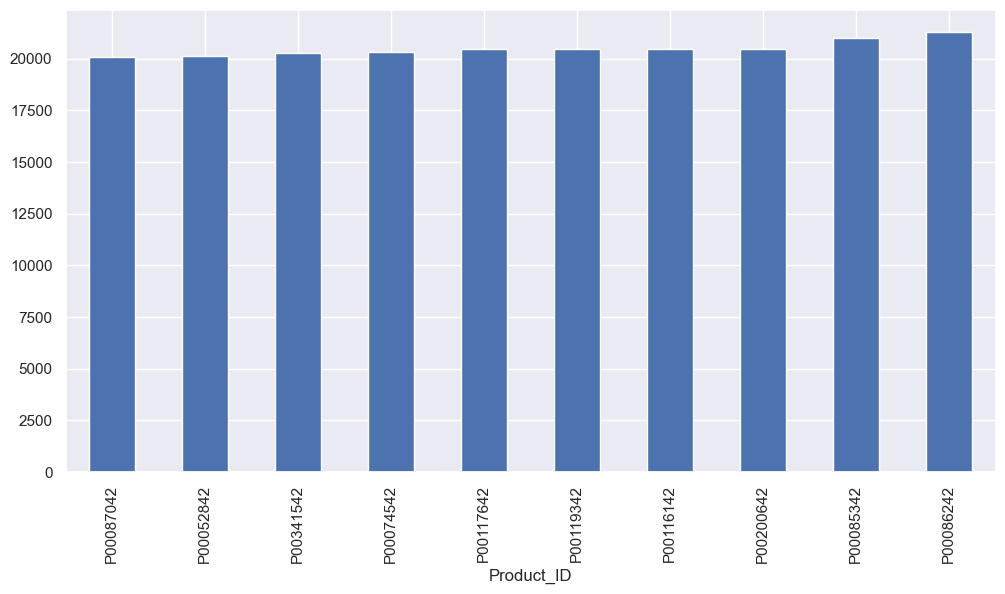

In [101]:
df.groupby('Product_ID')["Purchase"].mean().nlargest(10).sort_values().plot(kind='bar')
##These are most expensive products